- Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.
- This data was originally sourced from 538's Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [27]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

## Knicks vs Nets in 2010

In [28]:
knicks_pts = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts = nba_2010[nba_2010.fran_id == 'Nets']['pts']

### difference between the two teams’ average points scored

In [29]:
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
diff_means_2010

9.731707317073173

### Points scored for the Knicks compared to the Nets

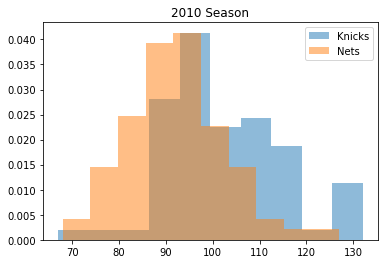

In [30]:
plt.hist(knicks_pts, alpha = .5, density = True, label = 'Knicks')
plt.hist(nets_pts, alpha = .5, density = True, label = 'Nets')
#note that density is used for newer version of matplotlib
plt.legend()
plt.title("2010 Season")
plt.show()

### All teams in the dataset and investigate the relationship between franchise and points scored per game in 2010

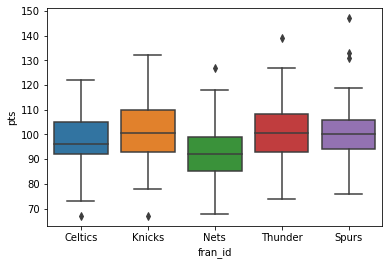

In [31]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

### lets find if teams tend to win more games at home compared to away.

In [32]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


In [33]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


#### Expected contingency table (if there were no association)

In [34]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


For a 2x2 table, Chi-squared greater than about 4 indicates an association.

### check if teams with a higher probability of winning (according to 538) also tend to win games by more points.

In [35]:
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
point_diff_forecast_cov

array([[186.56,   1.37],
       [  1.37,   0.05]])

## Knicks vs Nets in 2014

In [21]:
knicks_pts_14 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_14 = nba_2014[nba_2014.fran_id == 'Nets']['pts']

### difference between the two teams’ average points scored

In [22]:
diff_means_2014 = knicks_pts.mean() - nets_pts.mean()
diff_means_2014

0.44706798131809933

In [36]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

(0.44020887084680815, 9.410391573138826e-23)

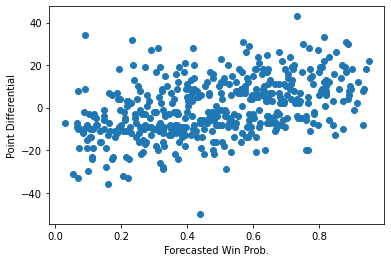

In [37]:
plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()

### Points scored for the Knicks compared to the Nets

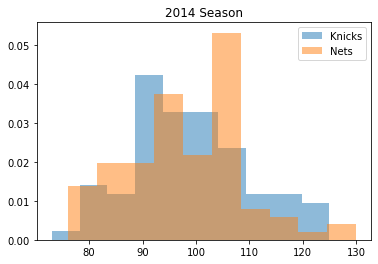

In [24]:
plt.hist(knicks_pts_14, alpha = .5, density = True, label = 'Knicks')
plt.hist(nets_pts_14, alpha = .5, density = True, label = 'Nets')
plt.legend()
plt.title("2014 Season")
plt.show()